## Lab 5
## Part 1: Data Exploration

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1')
df

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692
...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733
427,18,female,31.920,no,northeast,2205.98080
428,18,female,36.850,no,southeast,1629.83350
429,21,female,25.800,no,southwest,2007.94500


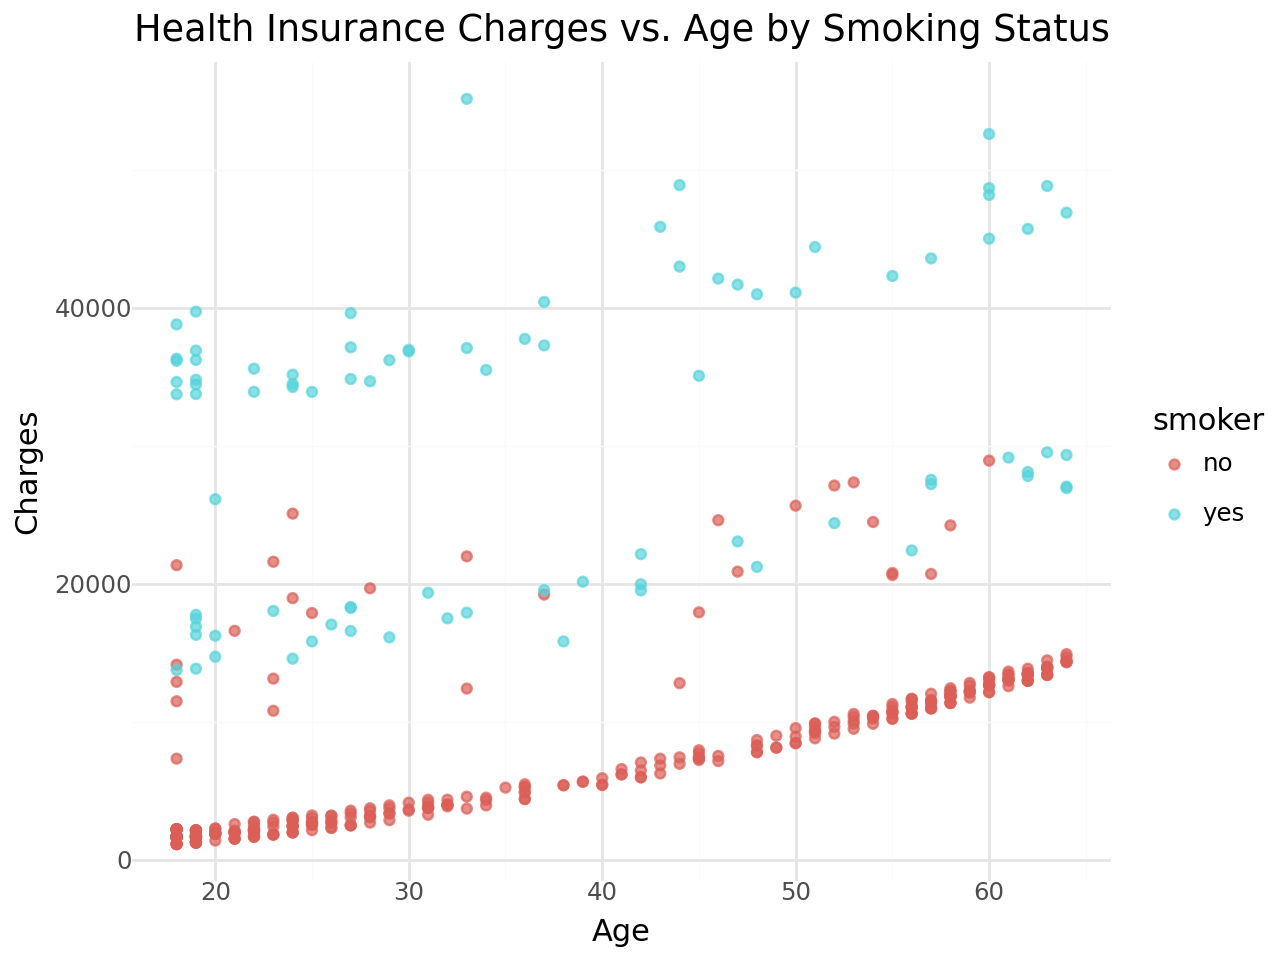

In [2]:
from plotnine import ggplot, aes, geom_point, geom_boxplot, labs, theme_minimal, theme

# Charges vs age
plot1 = (
    ggplot(df, aes(x='age', y='charges', color='smoker'))
    + geom_point(alpha=0.7)
    + labs(title="Health Insurance Charges vs. Age by Smoking Status",
         x="Age", y="Charges")
    + theme_minimal()
)
plot1

This plotshows charges based on age, colored by smoker to get a sense of the relationship of these three variables. Nonsmokers tend to have a similar pattern in charges as age increases. Smokers have much more variation and often pay much more in insurance charges, especially as age increases.

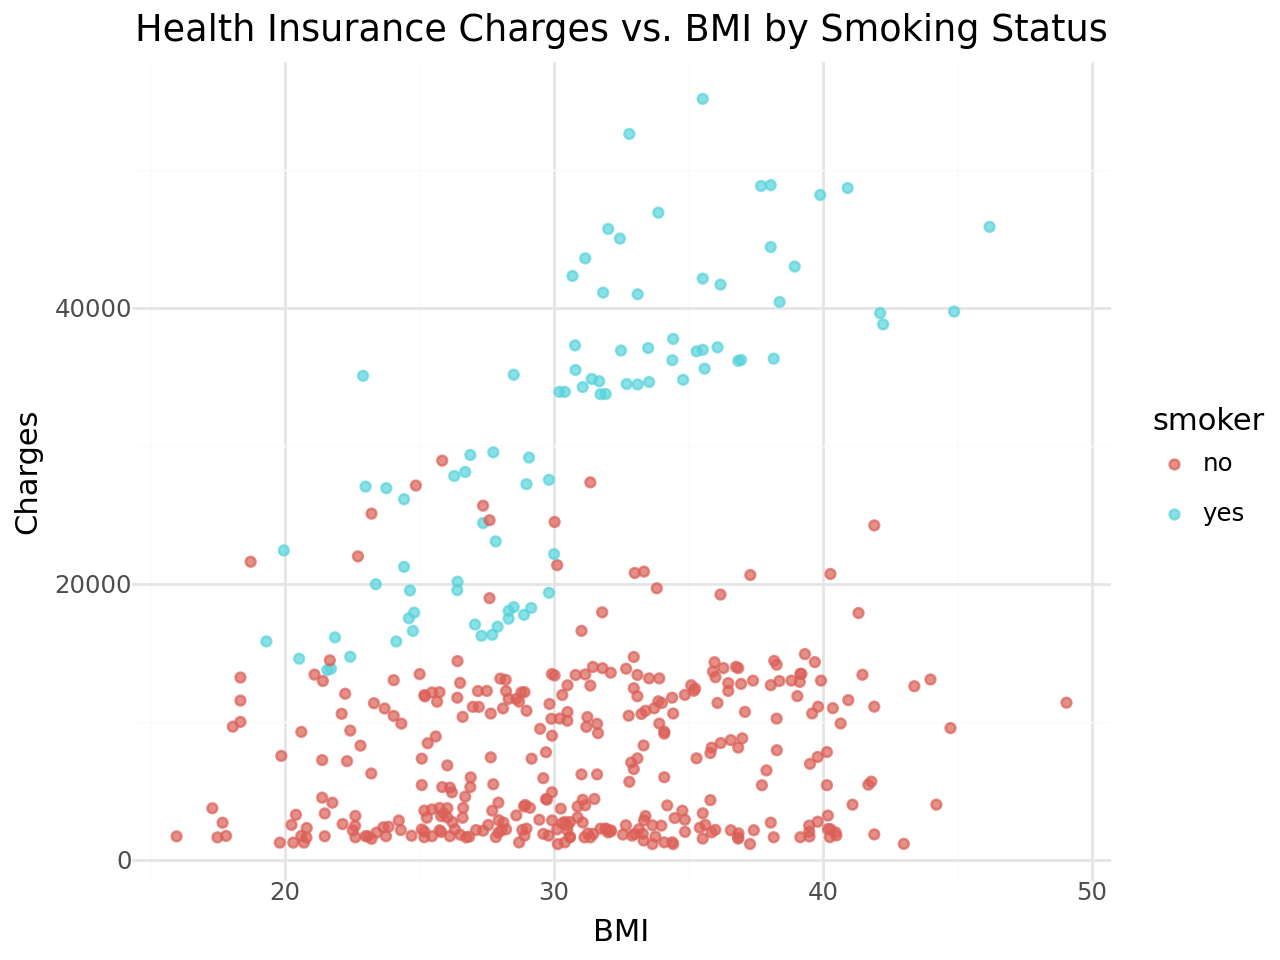

In [3]:

# Charges vs BMI
plot2 = (
    ggplot(df, aes(x='bmi', y='charges', color='smoker'))
    + geom_point(alpha=0.7)
    + labs(title="Health Insurance Charges vs. BMI by Smoking Status",
         x="BMI", y="Charges")
    + theme_minimal()
)
plot2

plot2 shows that as there is an interaction between smoking and BMI. People who don't smoke don't see a very strong correlation between BMI and charges, while people who do smoke see a very strong correlation between BMI and charges.

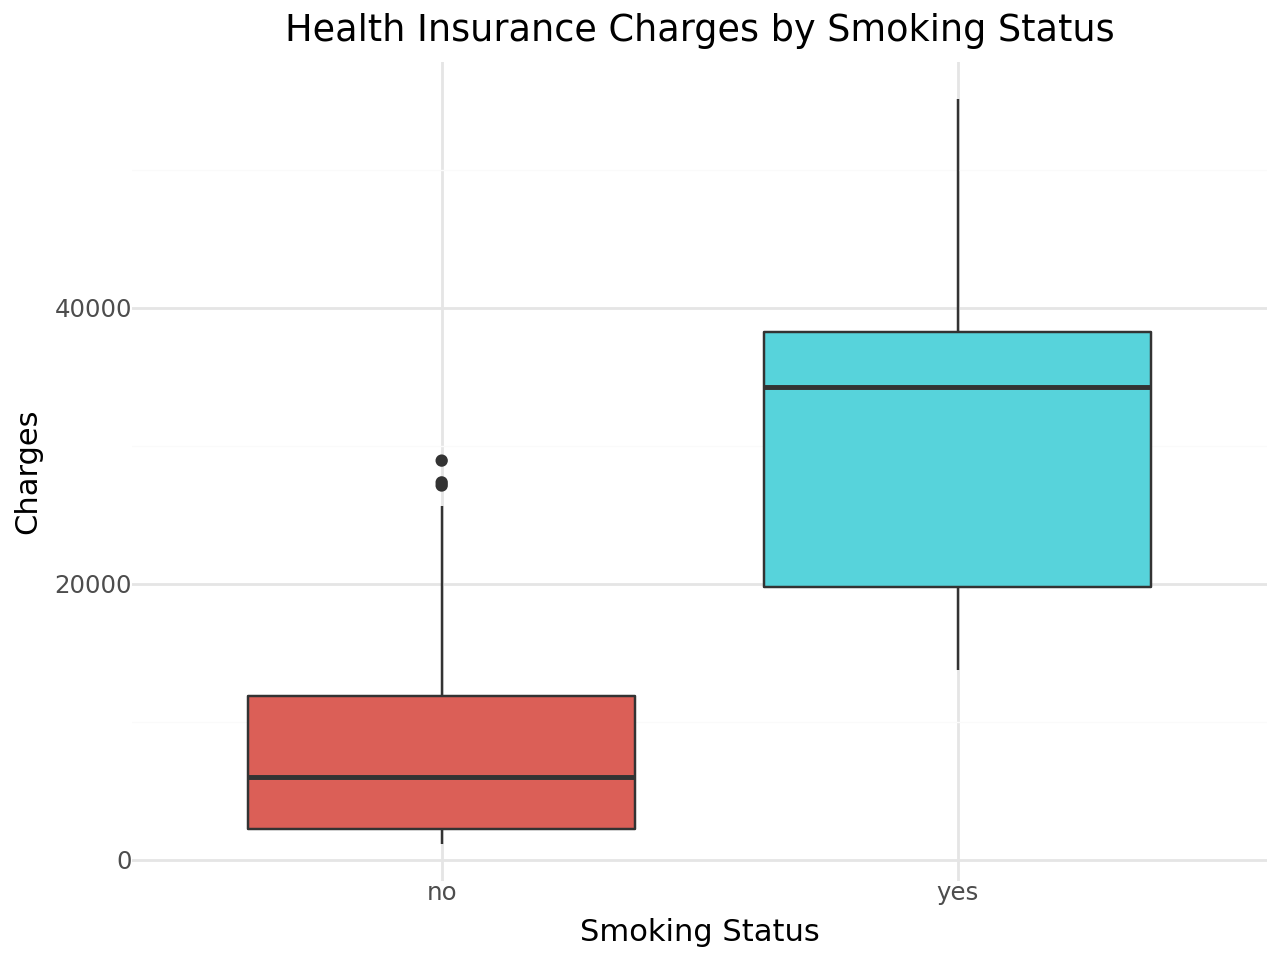

In [4]:
# Distribution of charges by smoking status
plot3 = (
    ggplot(df, aes(x='smoker', y='charges', fill='smoker'))
    + geom_boxplot()
    + labs(title="Health Insurance Charges by Smoking Status",
         x="Smoking Status", y="Charges")
    + theme_minimal()
    + theme(legend_position='none')
)
plot3

plot3 shows the istribution ofcharges for smokers and non-smokers. It is clear by this graph that smokers have more insurance charges.

## Part 2: Simple Linear Models

In [5]:
# Model 1: Charges ~ Age

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

X = df[['age', 'sex', 'smoker']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct_age = ColumnTransformer(
    [("standardize", StandardScaler(), ["age"])],
    remainder="drop"
)

lr_pipeline_age = Pipeline(
    [("preprocessing", ct_age),
     ("linear_regression", LinearRegression())]
)

lr_pipeline_age_fitted = lr_pipeline_age.fit(X_train[['age']], y_train)
y_preds_age = lr_pipeline_age_fitted.predict(X_test[['age']])
r2_age = r2_score(y_test, y_preds_age)

print("R-squared:", r2_age)
print("Coefficients:", lr_pipeline_age_fitted.named_steps['linear_regression'].coef_)
print("Intercept:", lr_pipeline_age_fitted.named_steps['linear_regression'].intercept_)

R-squared: 0.1287424190241595
Coefficients: [3481.01222635]
Intercept: 12198.76062159593


In [6]:
# Model 2: Charges ~ Age + Sex
ct_age_sex = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age"]),
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["sex"])
    ],
    remainder="drop"
)

lr_pipeline_age_sex = Pipeline(
    [("preprocessing", ct_age_sex),
     ("linear_regression", LinearRegression())]
)

lr_pipeline_age_sex_fitted = lr_pipeline_age_sex.fit(X_train, y_train)
y_preds_age_sex = lr_pipeline_age_sex_fitted.predict(X_test)
r2_age_sex = r2_score(y_test, y_preds_age_sex)

print("R-squared:", r2_age_sex)
print("Coefficients:", lr_pipeline_age_sex_fitted.named_steps['linear_regression'].coef_)
print("Intercept:", lr_pipeline_age_sex_fitted.named_steps['linear_regression'].intercept_)

R-squared: 0.10921970918963841
Coefficients: [3463.35626936 1604.48155824]
Intercept: 11424.504985935266


In [7]:
# Model 3: Charges ~ Age + Smoker
ct_age_smoker = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age"]),
        ("dummify", OneHotEncoder(drop='first', sparse_output=False), ["smoker"])
    ],
    remainder="drop"
)

lr_pipeline_age_smoker = Pipeline(
    [("preprocessing", ct_age_smoker),
     ("linear_regression", LinearRegression())]
)

lr_pipeline_age_smoker_fitted = lr_pipeline_age_smoker.fit(X_train, y_train)
y_preds_age_smoker = lr_pipeline_age_smoker_fitted.predict(X_test)
r2_age_smoker = r2_score(y_test, y_preds_age_smoker)

print("R-squared:", r2_age_smoker)
print("Coefficients:", lr_pipeline_age_smoker_fitted.named_steps['linear_regression'].coef_)
print("Intercept:", lr_pipeline_age_smoker_fitted.named_steps['linear_regression'].intercept_)

R-squared: 0.8316610385322897
Coefficients: [ 4037.37416022 23570.53079037]
Intercept: 7539.469651406871


In [8]:
from sklearn.metrics import mean_squared_error

mse_age = mean_squared_error(y_test, y_preds_age)
print("Model 1 MSE:", mse_age)

mse_age_sex = mean_squared_error(y_test, y_preds_age_sex)
print("Model 2 MSE:", mse_age_sex)

mse_age_smoker = mean_squared_error(y_test, y_preds_age_smoker)
print("Model 3 MSE:", mse_age_smoker)

Model 1 MSE: 141029548.95804176
Model 2 MSE: 144189669.48097306
Model 3 MSE: 27248850.771853052


Interpret models:
- The age coefficient for Model 1 and 2 are both about 3,500 even when the sex variable is added to the model in Model 2. This coefficient in these models mean that for every year increase in age, there is a 3,500 dollar increase in insurance charges. In Model 3, the notable coefficent is the smoker coefficient, which says that smokers on average have $23,570 more in insurance charges.
- Model 1 and 2 have very low R^2 values (below .15), suggesting that just age and age + sex do not explain charges. In fact they explain less than 15% of the variation in charges. Model 3 on the other hand explains 83.1% of the variation in charges. So, model 3 is the clear choice if we are to move forward in making new predictions.
- Looking at MSE, Model 3 has the lowest score, meaning it has the smallest residuals and the most fitting line.

## Part 3: Multiple Linear Models

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Model 4
X = df[['age', 'bmi', 'sex', 'smoker']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct_age_bmi = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi"])
    ],
    remainder="drop"
)

lr_pipeline_age_bmi = Pipeline(
    [("preprocessing", ct_age_bmi),
     ("linear_regression", LinearRegression())]
)

lr_pipeline_age_bmi_fitted = lr_pipeline_age_bmi.fit(X_train[['age', 'bmi']], y_train)
y_preds_age_bmi = lr_pipeline_age_bmi_fitted.predict(X_test[['age', 'bmi']])
r2_age_bmi = r2_score(y_test, y_preds_age_bmi)
mse_age_bmi = mean_squared_error(y_test, y_preds_age_bmi)


In [12]:
# Model 5
ct_age_squared = ColumnTransformer(
    [
        ("polynomial", PolynomialFeatures(degree=2, include_bias=False), ["age"])
    ],
    remainder="passthrough"
)

lr_pipeline_age_squared = Pipeline(
    [("preprocessing", ct_age_squared),
     ("linear_regression", LinearRegression())]
)

lr_pipeline_age_squared_fitted = lr_pipeline_age_squared.fit(X_train[['age']], y_train)
y_preds_age_squared = lr_pipeline_age_squared_fitted.predict(X_test[['age']])
r2_age_squared = r2_score(y_test, y_preds_age_squared)
mse_age_squared = mean_squared_error(y_test, y_preds_age_squared)

In [13]:
# Polynomial model of degree 4
ct_age_poly4 = ColumnTransformer(
    [
        ("polynomial", PolynomialFeatures(degree=4, include_bias=False), ["age"])
    ],
    remainder="passthrough"
)

lr_pipeline_poly4 = Pipeline(
    [("preprocessing", ct_age_poly4),
     ("linear_regression", LinearRegression())]
)

lr_pipeline_poly4_fitted = lr_pipeline_poly4.fit(X_train[['age']], y_train)
y_preds_poly4 = lr_pipeline_poly4_fitted.predict(X_test[['age']])
r2_poly4 = r2_score(y_test, y_preds_poly4)
mse_poly4 = mean_squared_error(y_test, y_preds_poly4)

In [14]:
# Polynomial model of degree 12
ct_age_poly12 = ColumnTransformer(
    [
        ("polynomial", PolynomialFeatures(degree=12, include_bias=False), ["age"])
    ],
    remainder="passthrough"
)

lr_pipeline_poly12 = Pipeline(
    [("preprocessing", ct_age_poly12),
     ("linear_regression", LinearRegression())]
)

lr_pipeline_poly12_fitted = lr_pipeline_poly12.fit(X_train[['age']], y_train)
y_preds_poly12 = lr_pipeline_poly12_fitted.predict(X_test[['age']])
r2_poly12 = r2_score(y_test, y_preds_poly12)
mse_poly12 = mean_squared_error(y_test, y_preds_poly12)

In [15]:
print("Model 4")
print("R-squared:", r2_age_bmi)
print("MSE:", mse_age_bmi)

print("\nModel 5")
print("R-squared:", r2_age_squared)
print("MSE:", mse_age_squared)

print("\nModel 6")
print("R-squared:", r2_poly4)
print("MSE:", mse_poly4)

print("\nModel 7")
print("R-squared:", r2_poly12)
print("MSE:", mse_poly12)

Model 4
R-squared: 0.1706876553903791
MSE: 134239917.63105714

Model 5
R-squared: 0.12914290286988972
MSE: 140964723.05883405

Model 6
R-squared: 0.14223541742765766
MSE: 138845451.48734245

Model 7
R-squared: 0.12370305661831282
MSE: 141845265.25440577


According to the R^2 values and MSE values, non of these models would be viable options. This is most likely due to the fact that none of them include th smoker variable, which is possibly the most important explanatory variable.

## Part 4: New Data


In [16]:
df_new = pd.read_csv('https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1')

In [17]:
# predict Model 1 on new data
new_predictions = lr_pipeline_age_fitted.predict(df_new[['age']])

# predict Model 4 on new data
new_predictions_age_bmi = lr_pipeline_age_bmi_fitted.predict(df_new[['age', 'bmi']])

In [18]:
# age, bmi, smoker model (new data)

ct_age_bmi_smoker = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi"]),
        ("dummify", OneHotEncoder(drop='first'), ["smoker"])
    ],
    remainder="drop"
)

lr_pipeline_age_bmi_smoker = Pipeline(
    [("preprocessing", ct_age_bmi_smoker),
     ("linear_regression", LinearRegression())]
)

lr_pipeline_age_bmi_smoker_fitted = lr_pipeline_age_bmi_smoker.fit(X_train, y_train)

y_preds_age_bmi_smoker = lr_pipeline_age_bmi_smoker_fitted.predict(X_test)
r2_age_bmi_smoker = r2_score(y_test, y_preds_age_bmi_smoker)
mse_age_bmi_smoker = mean_squared_error(y_test, y_preds_age_bmi_smoker)

print("R-squared: ", r2_age_bmi_smoker)
print("MSE: ", mse_age_bmi_smoker)

R-squared:  0.8608581088171381
MSE:  22522751.690389104


In [19]:
new_predictions_age_bmi_smoker = lr_pipeline_age_bmi_smoker_fitted.predict(df_new[['age', 'bmi', 'smoker']])

In [20]:
# age, bmi, smoker, (age + bmi):smoker
ct_age_bmi_smoker_interactions = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi"]),
        ("dummify", OneHotEncoder(drop='first'), ["smoker"]),
        ("interaction", PolynomialFeatures(degree=1, interaction_only=True, include_bias=False), ["age", "bmi"])
    ],
    remainder="drop"
)

lr_pipeline_age_bmi_smoker_interactions = Pipeline(
    [("preprocessing", ct_age_bmi_smoker_interactions),
     ("linear_regression", LinearRegression())]
)

lr_pipeline_age_bmi_smoker_interactions_fitted = lr_pipeline_age_bmi_smoker_interactions.fit(X_train, y_train)

y_preds_age_bmi_smoker_interactions = lr_pipeline_age_bmi_smoker_interactions_fitted.predict(X_test)
r2_age_bmi_smoker_interactions = r2_score(y_test, y_preds_age_bmi_smoker_interactions)
mse_age_bmi_smoker_interactions = mean_squared_error(y_test, y_preds_age_bmi_smoker_interactions)

print("R-squared: ", r2_age_bmi_smoker_interactions)
print("MSE: ", mse_age_bmi_smoker_interactions)

R-squared:  0.8608581088171379
MSE:  22522751.69038916


In [21]:
new_predictions_age_bmi_smoker_interactions = lr_pipeline_age_bmi_smoker_interactions_fitted.predict(df_new[['age', 'bmi', 'smoker']])

In [22]:
#
ct_age_bmi_smoker_full_interactions = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi"]),
        ("dummify", OneHotEncoder(drop='first'), ["smoker"]),
        ("interaction", PolynomialFeatures(degree=2, interaction_only=False, include_bias=False), ["age", "bmi"])
    ],
    remainder="drop"
)

# Create and fit the pipeline with full interaction terms
lr_pipeline_age_bmi_smoker_full_interactions = Pipeline(
    [("preprocessing", ct_age_bmi_smoker_full_interactions),
     ("linear_regression", LinearRegression())]
)

# Fit the model
lr_pipeline_age_bmi_smoker_full_interactions_fitted = lr_pipeline_age_bmi_smoker_full_interactions.fit(X_train, y_train)

# Predict and evaluate the model
y_preds_age_bmi_smoker_full_interactions = lr_pipeline_age_bmi_smoker_full_interactions_fitted.predict(X_test)
r2_age_bmi_smoker_full_interactions = r2_score(y_test, y_preds_age_bmi_smoker_full_interactions)
mse_age_bmi_smoker_full_interactions = mean_squared_error(y_test, y_preds_age_bmi_smoker_full_interactions)

# Print evaluation metrics
print("R-squared: ", r2_age_bmi_smoker_full_interactions)
print("MSE: ", mse_age_bmi_smoker_full_interactions)

R-squared:  0.8572631522505729
MSE:  23104663.531590633


In [23]:
new_predictions_age_bmi_smoker_full_interactions = lr_pipeline_age_bmi_smoker_full_interactions_fitted.predict(df_new[['age', 'bmi', 'smoker']])

In [ ]:
# charges ~ age
r2_new = r2_score(y, new_predictions)
mse_new = mean_squared_error(y, new_predictions)

# charges ~ age + bmi
r2_new_age_bmi = r2_score(y, new_predictions_age_bmi)
mse_new_age_bmi = mean_squared_error(y, new_predictions_age_bmi)

# charges ~ age + bmi + smoker
r2_new_age_bmi_smoker = r2_score(y, new_predictions_age_bmi_smoker)
mse_new_age_bmi_smoker = mean_squared_error(y, new_predictions_age_bmi_smoker)

# charges ~ age + bmi + (age+bmi):smoker
r2_new_age_bmi_smoker_interactions = r2_score(y, new_predictions_age_bmi_smoker_interactions)
mse_new_age_bmi_smoker_interactions = mean_squared_error(y, new_predictions_age_bmi_smoker_interactions)

# charges ~ age + bmi + smoker + (age+bmi)*smoker)
r2_new_age_bmi_smoker_full_interactions = r2_score(y, new_predictions_age_bmi_smoker_full_interactions)
mse_new_age_bmi_smoker_full_interactions = mean_squared_error(y, new_predictions_age_bmi_smoker_full_interactions)

# print new predictions R-squared and MSE values
print("charges ~ age:")
print("R-squared: ", r2_new)
print("MSE: ", mse_new)

print("\ncharges ~ age + bmi:")
print("R-squared: ", r2_new_age_bmi)
print("MSE: ", mse_new_age_bmi)

print("\ncharges ~ age + bmi + smoker:")
print("R-squared: ", r2_new_age_bmi_smoker)
print("MSE: ", mse_new_age_bmi_smoker)

print("\ncharges ~ age + bmi + (age + bmi):smoker:")
print("R-squared: ", r2_new_age_bmi_smoker_interactions)
print("MSE: ", mse_new_age_bmi_smoker_interactions)

print("\ncharges ~ age + bmi + smoker + (age + bmi)*smoker):")
print("R-squared: ", r2_new_age_bmi_smoker_full_interactions)
print("MSE: ", mse_new_age_bmi_smoker_full_interactions)

In [ ]:
from plotnine import ggplot, aes, geom_point, geom_hline, labs, theme_minimal

residuals = y - new_predictions_age_bmi_smoker_full_interactions

residuals_df = pd.DataFrame({
    'age': X['age'],
    'residuals': residuals
})

residuals_plot = (
    ggplot(residuals_df, aes(x='age', y='residuals')) +
    geom_point(alpha=0.5, color='blue') +
    geom_hline(yintercept=0, linetype="dashed", color="red") +
    labs(title='Residuals for Winning Model (charges ~ age + bmi + smoker + (age + bmi)*smoker)',
         x='Age',
         y='Residuals') +
    theme_minimal()
)

residuals_plot